# Instalação das bibliotécas

In [ ]:
import pandas as pd # Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import matplotlib.pyplot as plt # Importar a biblioteca para criação de gráficos

# Carregar arquivo

In [ ]:
# Os arquivos originais no site estam no formato CSV. Mas o formato é mais compativel com excel por ja estarem em colunas separadas
#e não por nenhum sinal. Abri individualmente cada arquivo e salvei no formato do excel
fem_2018 = pd.read_excel('/content/feminicidio_2018.xls')
fem_2019 = pd.read_excel('/content/feminicidio_2019.xls')
fem_2020 = pd.read_excel('/content/feminicidio_2020.xls')
fem_2021 = pd.read_excel('/content/feminicidio_2021.xls')
fem_2022 = pd.read_excel('/content/feminicidio_2022.xls')
fem_2023 = pd.read_excel('/content/feminicidio_2023.xls')
#Origem dos dados: https://dados.gov.br/dados/conjuntos-dados/violencia-contra-mulher

In [ ]:
# Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado os dados iniciais
fem_2018.head()

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,tentado_consumado,qtde_vitimas
0,317010,UBERABA,2018-01-01,1,2018,5º RISP - Uberaba,3) Interior de MG,CONSUMADO,1
1,314390,MURIAE,2018-01-02,1,2018,4º RISP - Juiz de Fora,3) Interior de MG,TENTADO,1
2,312410,ESMERALDAS,2018-01-03,1,2018,2º RISP - Contagem,2) RMBH (sem BH),TENTADO,1
3,317080,VARZEA DA PALMA,2018-01-06,1,2018,14º RISP - Curvelo,3) Interior de MG,TENTADO,2
4,312540,FELICIO DOS SANTOS,2018-01-06,1,2018,14º RISP - Curvelo,3) Interior de MG,CONSUMADO,1


In [ ]:
# Cria uma tupla com os nomes de todos os arquivos em uso
arquivo = (fem_2018, fem_2019, fem_2020, fem_2021, fem_2022, fem_2023)

In [ ]:
# Como todos os arquivos possiem uma coluna com o ano e o mês da ocorrência opto por transformar em um único dataframe (concatenado)
mulher = pd.concat(arquivo)
mulher.head()

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,tentado_consumado,qtde_vitimas
0,317010,UBERABA,2018-01-01,1,2018,5º RISP - Uberaba,3) Interior de MG,CONSUMADO,1
1,314390,MURIAE,2018-01-02,1,2018,4º RISP - Juiz de Fora,3) Interior de MG,TENTADO,1
2,312410,ESMERALDAS,2018-01-03,1,2018,2º RISP - Contagem,2) RMBH (sem BH),TENTADO,1
3,317080,VARZEA DA PALMA,2018-01-06,1,2018,14º RISP - Curvelo,3) Interior de MG,TENTADO,2
4,312540,FELICIO DOS SANTOS,2018-01-06,1,2018,14º RISP - Curvelo,3) Interior de MG,CONSUMADO,1


# Análise dos dados

In [ ]:
# Conta se há dados nulos
mulher.isna().sum()

municipio_cod        0
municipio_fato       0
data_fato            0
mes                  0
ano                  0
risp                 0
rmbh                 0
tentado_consumado    0
qtde_vitimas         0
dtype: int64

In [ ]:
# Trás as informações dos dados. Principalmente seu dtype.
mulher.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 0 to 175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   municipio_cod      1958 non-null   int64         
 1   municipio_fato     1958 non-null   object        
 2   data_fato          1958 non-null   datetime64[ns]
 3   mes                1958 non-null   int64         
 4   ano                1958 non-null   int64         
 5   risp               1958 non-null   object        
 6   rmbh               1958 non-null   object        
 7   tentado_consumado  1958 non-null   object        
 8   qtde_vitimas       1958 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 153.0+ KB


In [ ]:
# Verificar se há linhas com valores duplicados
mulher.duplicated().sum()

0

In [ ]:
# Verificar se há algum valor fora do padrão como outliers
mulher.describe()

,municipio_cod,data_fato,mes,ano,qtde_vitimas
count,1958.000000,1958,1958.000000,1958.000000,1958.000000
mean,313363.275281,2020-09-08 08:20:50.255362560,6.468846,2020.193054,1.041879
min,310020.000000,2018-01-01 00:00:00,1.000000,2018.000000,1.000000
25%,311120.000000,2019-03-31 12:00:00,3.000000,2019.000000,1.000000
50%,313365.000000,2020-08-26 00:00:00,6.000000,2020.000000,1.000000
75%,315200.000000,2022-02-22 18:00:00,9.000000,2022.000000,1.000000
max,317200.000000,2023-07-30 00:00:00,12.000000,2023.000000,4.000000
std,2219.220113,NaN,3.455802,1.637112,0.215123


# Exposição dos dados

Oscilação de denuncias por ano

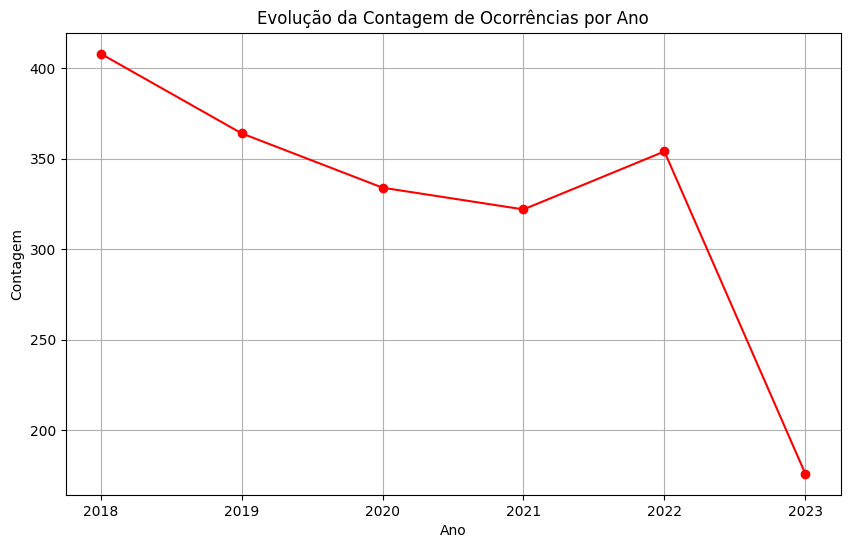

In [ ]:
# Contagem de ocorrências de cada ano
contagem_por_ano = mulher['ano'].value_counts().sort_index()

# Criação do gráfico de linha
plt.figure(figsize=(10, 6))
contagem_por_ano.plot(kind='line', marker='o', color='red', linestyle='-')
plt.title('Evolução da Contagem de Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

Município da denúncia

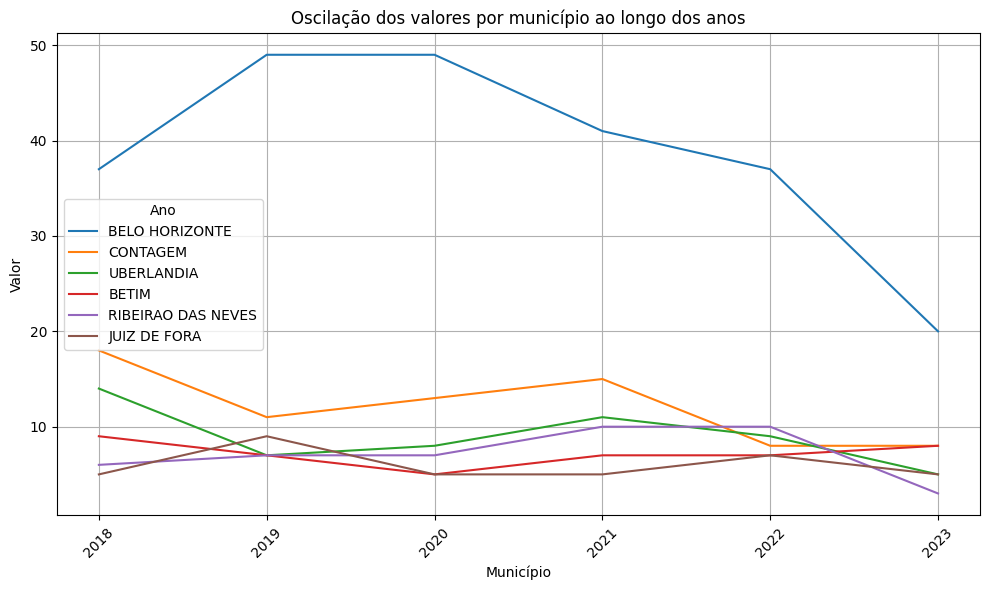

In [ ]:
anos = (2018, 2019, 2020, 2021, 2022, 2023)
municipios = {}

# Use value_counts() para obter a contagem de ocorrências de cada município
contagem_municipios = mulher['municipio_fato'].value_counts()

# Lista dos 6 municípios mais frequentes
top_6_municipios = contagem_municipios.head(6).index.tolist()

# Para cada município, realizar a contagem ao longo do tempo
for municipio in top_6_municipios:
  quantidade = []
  for ano in anos:
    temporario = mulher[(mulher['ano'] == ano)]
    quantidade.append(temporario['municipio_fato'].value_counts()[municipio])
  municipios[municipio] = quantidade

municipios = pd.DataFrame(municipios)

municipios.index = anos

# Plotar um gráfico de linhas para cada município
municipios.plot(kind='line', figsize=(10, 6))

# Adicionar rótulos e legendas ao gráfico
plt.xlabel('Município')
plt.ylabel('Valor')
plt.title('Oscilação dos valores por município ao longo dos anos')
plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Ajusta automaticamente o layout do gráfico para evitar sobreposição de elementos
plt.show()

Oscilação de ocorrencia por mês

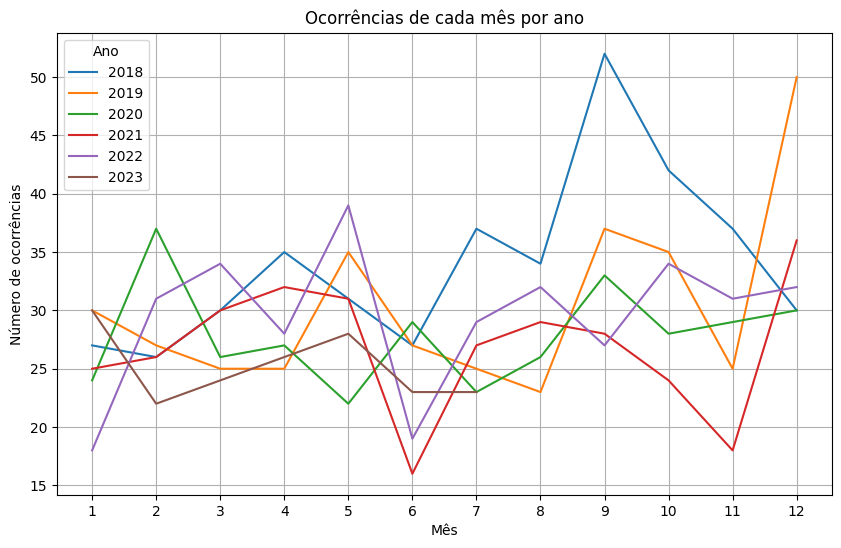

In [ ]:
# Contagem de ocorrências de cada mês dentro de cada ano
contagem = mulher.groupby(['ano', 'mes']).size().reset_index(name='contagem')

# Aumento do tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criação do gráfico de linha
for ano in contagem['ano'].unique():
    dados_ano = contagem[contagem['ano'] == ano]
    plt.plot(dados_ano['mes'], dados_ano['contagem'], label=str(ano))

plt.xlabel('Mês')
plt.ylabel('Número de ocorrências')
plt.title('Ocorrências de cada mês por ano')
plt.legend(title='Ano')
plt.grid(True)
plt.xticks(range(1, 13))  # Definindo os ticks do eixo x para representar os meses
plt.show()

Oscilação de número de ocorrências não consumadas (tentadas) e de consumadas

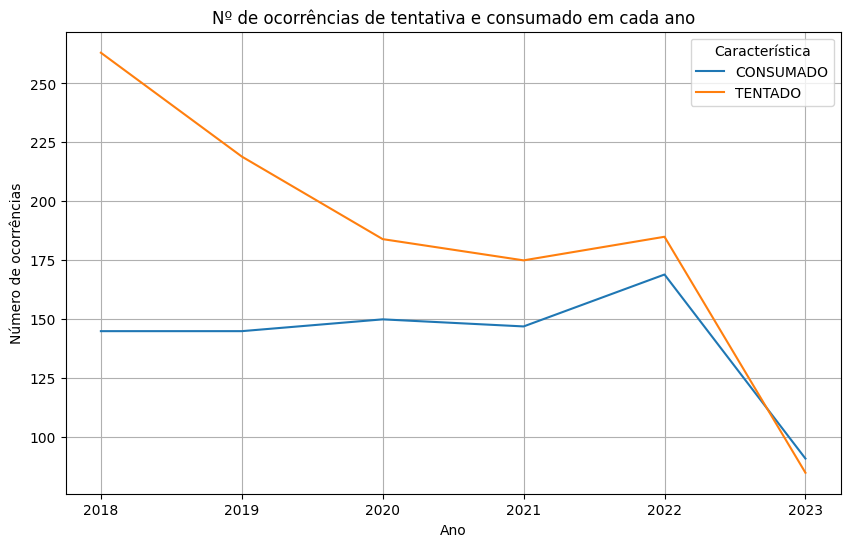

In [ ]:
# Contagem de ocorrências de cada característica dentro de cada ano
contagem = mulher.groupby(['ano', 'tentado_consumado']).size().reset_index(name='contagem')

# Aumento do tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criação do gráfico de linha
for caracteristica in contagem['tentado_consumado'].unique():
    dados_caracteristica = contagem[contagem['tentado_consumado'] == caracteristica]
    plt.plot(dados_caracteristica['ano'], dados_caracteristica['contagem'], label=caracteristica)

plt.xlabel('Ano')
plt.ylabel('Número de ocorrências')
plt.title('Nº de ocorrências de tentativa e consumado em cada ano')
plt.legend(title='Característica')
plt.grid(True)
plt.xticks(contagem['ano'].unique())  # Definindo os ticks do eixo x para representar os anos
plt.show()

Oscilação por número de vítimas por ano

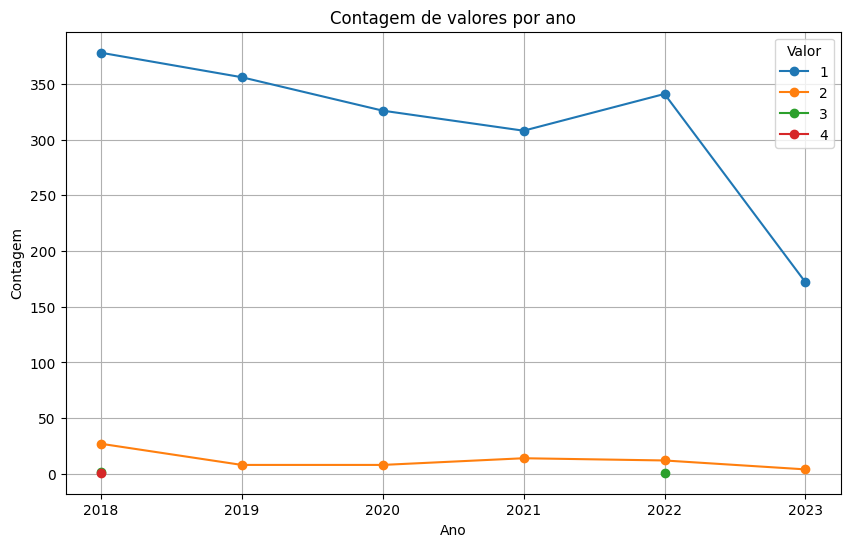

In [ ]:
# Agrupar por ano e valor e contar o número de ocorrências
grouped = mulher.groupby(['ano', 'qtde_vitimas']).size().unstack()

# Aumentar o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico
grouped.plot(ax=ax, marker='o')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Contagem de valores por ano')
plt.legend(title='Valor')
plt.grid(True)
plt.show()

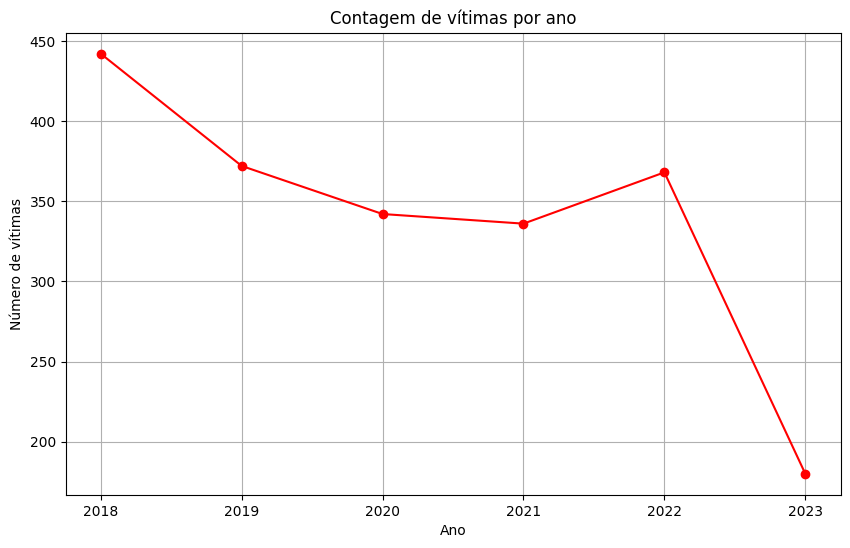

In [ ]:
# Agrupar por ano e calcular a soma dos valores
sum_by_year = mulher.groupby('ano')['qtde_vitimas'].sum()

# Aumentar o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico
plt.plot(sum_by_year.index, sum_by_year.values, color='red', marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Número de vítimas')
plt.title('Contagem de vítimas por ano')
plt.grid(True)
plt.show()